# Assignment 4

### Submitted by Ashutosh Bandooni

In [62]:
import numpy as np  
import pandas as pd     
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [11]:
empdata = pd.read_csv("employees.csv")

In [12]:
empdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [15]:
empdata.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [13]:
empdata.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Basic Visualisation and Preprocessing 

In [17]:
empdata.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

StandardHours, Over18 and EmployeeCount seem to only have 1 unique value or 1 class of values, meaning they won't be able to help much in predictions. So, we drop them

In [18]:
empdata = empdata.drop(columns=["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"])

In [25]:
numeric_columns = list(empdata.select_dtypes(exclude="object").columns)

In [26]:
numeric_columns

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

<AxesSubplot:>

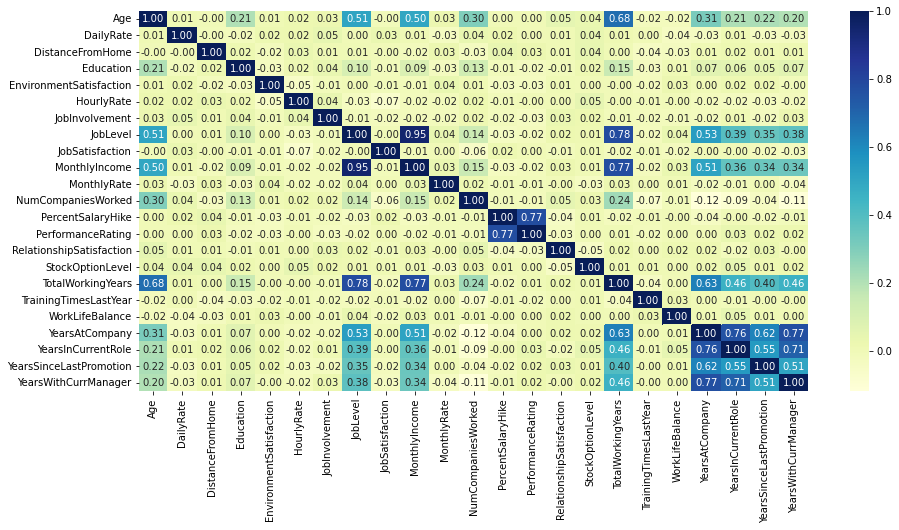

In [21]:
plt.figure(figsize=(15, 7))
sns.heatmap(empdata.corr(), annot=True, fmt="0.2f", cmap="YlGnBu")

One hot encoding and mapping categoric values

In [27]:
empdata.Attrition = empdata.Attrition.map({"Yes" : 1 , "No" : 0})
empdata["OverTime"] = empdata.OverTime.map({"Yes":1, "No":0})


In [28]:
nonnumericcols = list(empdata.select_dtypes(include="object").columns)

In [29]:
empdata = pd.get_dummies(data=empdata, columns=nonnumericcols, drop_first=True)

In [30]:
empdata.head(5)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,40,3,1,2,...,0,1,0,0,0,0,0,0,1,0


In [32]:
X = empdata.drop(columns = ["Attrition"])
y = empdata.Attrition

Scaling

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,...,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.918921,1.458650
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,...,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,...,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,1.458650
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,...,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,...,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1, stratify=y)

### Building the Logistic Regression Model and evaluating metrics

In [37]:
lrmodel = LogisticRegression()
lrmodel.fit(X_train, y_train)

LogisticRegression()

In [38]:
y_predlrmod = lrmodel.predict(X_test)

In [45]:
plt.figure(figsize=(16,9))
confusion_matrix(y_true=y_test,y_pred = y_predlrmod)

array([[232,  15],
       [ 26,  21]], dtype=int64)

<Figure size 1152x648 with 0 Axes>

In [41]:
lrmodel.score(X_test,y_test)

0.8605442176870748

In [66]:
print(classification_report(y_test,y_predlrmod))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       247
           1       0.58      0.45      0.51        47

    accuracy                           0.86       294
   macro avg       0.74      0.69      0.71       294
weighted avg       0.85      0.86      0.85       294



In [71]:
y_lrprobs=lrmodel.predict_proba(X_test)[:,1]

In [72]:
fprlr,tprlr,thresholds = roc_curve(y_test,y_lrprobs)

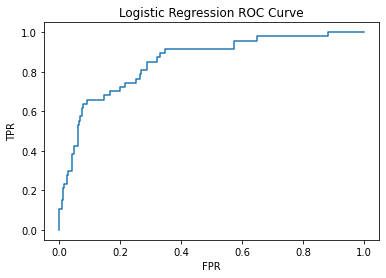

In [74]:
plt.plot(fprlr,tprlr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Logistic Regression ROC Curve')
plt.show()

### Building the Decision Tree Model and evaluating metrics

In [52]:
parameters = {
 'criterion':['gini','entropy'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [53]:
dtmod = DecisionTreeClassifier()

In [54]:
optimclf = GridSearchCV(dtmod,parameters,cv = 5)

In [55]:
optimclf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [56]:
optimclf.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'splitter': 'random'}

In [59]:
optimdtmod = DecisionTreeClassifier(criterion = 'gini',
 max_depth =  3,
 max_features =  'auto',
 splitter = 'random')

In [60]:
optimdtmod.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features='auto', splitter='random')

In [61]:
optimdtmod.score(X_test,y_test)

0.8435374149659864

In [63]:
y_dtpred = optimdtmod.predict(X_test)

In [65]:
print(classification_report(y_test,y_dtpred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       1.00      0.02      0.04        47

    accuracy                           0.84       294
   macro avg       0.92      0.51      0.48       294
weighted avg       0.87      0.84      0.78       294



In [67]:
y_dtprobs=optimdtmod.predict_proba(X_test)[:,1]

In [69]:
fprdt,tprdt,tsholds = roc_curve(y_test,y_dtprobs)

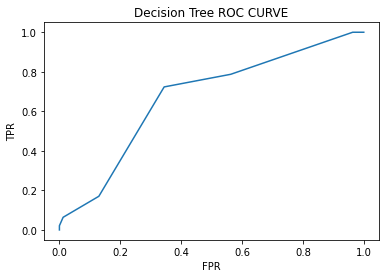

In [73]:
plt.plot(fprdt,tprdt)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Decision Tree ROC CURVE')
plt.show()